In [86]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [87]:
df=pd.read_csv("data.csv")
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [88]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  
0      2.99     4.80        0  
1      5.05    12.00        0  
2      1.04     1.89        0  
3      1.75     7.56        0  
4      0.76     5.96        1

In [89]:
df["default"].value_counts()

0    952
1    548
Name: default, dtype: int64

In [135]:
df.corr()['default']

branch                  0.031885
ncust                   0.013134
customer                0.031533
age                    -0.292649
ed                      0.082177
employ                 -0.299504
address                -0.274464
income                 -0.101229
debtinc                 0.363585
creddebt                0.184125
othdebt                 0.082643
default                 1.000000
total_debt              0.127407
sum_debts               0.276969
avg_debts               0.276969
debt_income             0.364237
avg_debt_income         0.364237
debt_ed                 0.136277
avg_debt_ed             0.136277
sum_debtinc_creddebt    0.355465
avg_debtinc_creddebt    0.355465
Name: default, dtype: float64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1500 non-null   int64  
 1   ncust     1500 non-null   int64  
 2   customer  1500 non-null   int64  
 3   age       1500 non-null   int64  
 4   ed        1500 non-null   int64  
 5   employ    1500 non-null   int64  
 6   address   1500 non-null   int64  
 7   income    1500 non-null   int64  
 8   debtinc   1500 non-null   float64
 9   creddebt  1500 non-null   float64
 10  othdebt   1500 non-null   float64
 11  default   1500 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 140.8 KB


In [91]:
df.dtypes

branch        int64
ncust         int64
customer      int64
age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default       int64
dtype: object

In [92]:
df["total_debt"]=df["creddebt"]+df["othdebt"]

In [93]:
df.shape

(1500, 13)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   branch      1500 non-null   int64  
 1   ncust       1500 non-null   int64  
 2   customer    1500 non-null   int64  
 3   age         1500 non-null   int64  
 4   ed          1500 non-null   int64  
 5   employ      1500 non-null   int64  
 6   address     1500 non-null   int64  
 7   income      1500 non-null   int64  
 8   debtinc     1500 non-null   float64
 9   creddebt    1500 non-null   float64
 10  othdebt     1500 non-null   float64
 11  default     1500 non-null   int64  
 12  total_debt  1500 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 152.5 KB


In [95]:
df["ed"].value_counts()

2    527
3    333
4    310
1    246
5     84
Name: ed, dtype: int64

In [96]:
def plot_scatter(a,b):
    plt.scatter(df[a], df[b])
    plt.show()

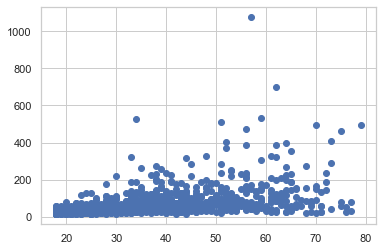

In [97]:
plot_scatter("age","income")

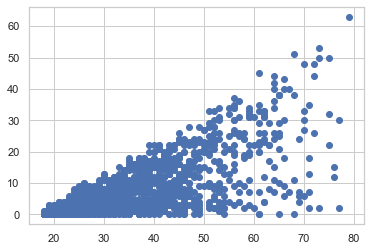

In [98]:
plot_scatter("age","employ")

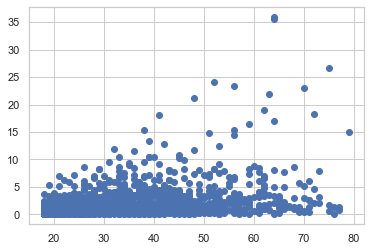

In [99]:
plot_scatter("age","creddebt")

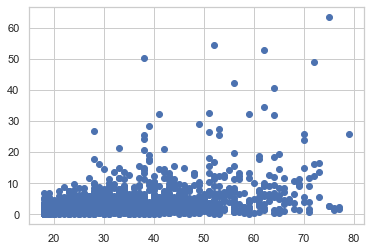

In [100]:
plot_scatter("age","othdebt")

In [101]:
df=df[df["income"]<1000]

In [102]:
df.shape

(1499, 13)

In [103]:
df=df[df["creddebt"]<35]

In [104]:
df.shape

(1497, 13)

In [105]:
df["age"].value_counts()

18    71
19    69
23    65
20    63
30    60
26    58
25    56
24    54
28    51
21    49
22    47
33    46
27    45
29    45
34    45
37    37
32    36
39    33
35    33
31    33
36    32
40    32
38    31
41    30
42    29
43    29
46    25
45    23
47    20
44    18
52    17
51    17
53    16
49    15
56    15
48    13
61    12
62    11
59    11
54    10
65     9
50     9
64     8
57     7
58     7
55     7
66     6
63     5
70     5
71     5
69     4
68     4
72     3
73     3
60     3
75     3
76     2
77     2
67     2
79     1
Name: age, dtype: int64

In [106]:
df["default"].value_counts()

0    951
1    546
Name: default, dtype: int64

In [107]:
df=df.dropna()

In [108]:
df.shape

(1497, 13)

In [109]:
df=df.astype({'default':int})


In [110]:
df['default'].value_counts()

0    951
1    546
Name: default, dtype: int64

In [111]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1497 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   branch      1497 non-null   int64  
 1   ncust       1497 non-null   int64  
 2   customer    1497 non-null   int64  
 3   age         1497 non-null   int64  
 4   ed          1497 non-null   int64  
 5   employ      1497 non-null   int64  
 6   address     1497 non-null   int64  
 7   income      1497 non-null   int64  
 8   debtinc     1497 non-null   float64
 9   creddebt    1497 non-null   float64
 10  othdebt     1497 non-null   float64
 11  default     1497 non-null   int64  
 12  total_debt  1497 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 163.7 KB


In [112]:
df['sum_debts']=df['debtinc']+df['creddebt']+df['othdebt']

In [113]:
df.head(2)

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   

   creddebt  othdebt  default  total_debt  sum_debts  
0      2.99      4.8        0        7.79      25.49  
1      5.05     12.0        0       17.05      31.75

In [114]:
df['avg_debts']=df['sum_debts']/3

In [115]:
df.head(2)

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   

   creddebt  othdebt  default  total_debt  sum_debts  avg_debts  
0      2.99      4.8        0        7.79      25.49   8.496667  
1      5.05     12.0        0       17.05      31.75  10.583333

In [116]:
df['debt_income']=df['sum_debts']/df['income']

In [117]:
df.head()

branch  ncust  customer  age  ed  employ  address  income  debtinc  \
0       3   3017     10012   28   2       7        2      44     17.7   
1       3   3017     10017   64   5      34       17     116     14.7   
2       3   3017     10030   40   1      20       12      61      4.8   
3       3   3017     10039   30   1      11        3      27     34.5   
4       3   3017     10069   25   1       2        2      30     22.4   

   creddebt  othdebt  default  total_debt  sum_debts  avg_debts  debt_income  
0      2.99     4.80        0        7.79      25.49   8.496667     0.579318  
1      5.05    12.00        0       17.05      31.75  10.583333     0.273707  
2      1.04     1.89        0        2.93       7.73   2.576667     0.126721  
3      1.75     7.56        0        9.31      43.81  14.603333     1.622593  
4      0.76     5.96        1        6.72      29.12   9.706667     0.970667

In [118]:
df['avg_debt_income']=df['avg_debts']/df['income']

In [119]:
df['debt_ed']=df['sum_debts']/df['ed']

In [120]:
df[df['ed']<0]

Empty DataFrame
Columns: [branch, ncust, customer, age, ed, employ, address, income, debtinc, creddebt, othdebt, default, total_debt, sum_debts, avg_debts, debt_income, avg_debt_income, debt_ed]
Index: []

In [121]:
df['avg_debt_ed']=df['avg_debts']/df['ed']

In [122]:
df['sum_debtinc_creddebt']=df['debtinc']+df['creddebt']

In [123]:
df['avg_debtinc_creddebt']=df['sum_debtinc_creddebt']/2

In [124]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'total_debt',
       'sum_debts', 'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed',
       'avg_debt_ed', 'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

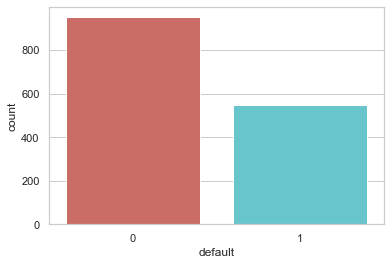

In [125]:
sns.countplot(x='default',data=df, palette='hls')
plt.show()

In [126]:
df.groupby('default').mean()

branch        ncust       customer        age        ed    employ  \
default                                                                         
0        51.502629  3469.835962  254267.552050  37.022082  2.566772  8.927445   
1        53.351648  3493.435897  263404.998168  29.062271  2.761905  3.384615   

          address     income    debtinc  creddebt   othdebt  total_debt  \
default                                                                   
0        7.526814  63.250263   8.083912  1.512093  3.469432    4.981525   
1        4.097070  50.419414  13.105678  2.547473  4.361392    6.908864   

         sum_debts  avg_debts  debt_income  avg_debt_income   debt_ed  \
default                                                                 
0        13.065436   4.355145     0.284699         0.094900  6.602676   
1        20.014542   6.671514     0.507056         0.169019  8.600298   

         avg_debt_ed  sum_debtinc_creddebt  avg_debtinc_creddebt  
default                                                           
0           2.200892              9.596004              4.798002  
1           2.866766             15.653150              7.826575

In [127]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'total_debt',
       'sum_debts', 'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed',
       'avg_debt_ed', 'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [137]:
df.corr()["default"]

branch                  0.031885
ncust                   0.013134
customer                0.031533
age                    -0.292649
ed                      0.082177
employ                 -0.299504
address                -0.274464
income                 -0.101229
debtinc                 0.363585
creddebt                0.184125
othdebt                 0.082643
default                 1.000000
total_debt              0.127407
sum_debts               0.276969
avg_debts               0.276969
debt_income             0.364237
avg_debt_income         0.364237
debt_ed                 0.136277
avg_debt_ed             0.136277
sum_debtinc_creddebt    0.355465
avg_debtinc_creddebt    0.355465
Name: default, dtype: float64

In [ ]:
df=df[["","","","",""]]

In [160]:
df1=df[["debtinc","employ","age","total_debt","default","income"]]

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [166]:
df1=df1[df1["employ"]<60]
df1=df1[df1["income"]<700]
X = df1.loc[:, df1.columns != 'default']
y = df1.loc[:, df1.columns == 'default']
print(calculate_acc(X,y,LogisticRegression(max_iter=300)))
print(calculate_acc(X,y,DecisionTreeRegressor()))
print(calculate_acc(X,y,RandomForestClassifier()))

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_3328/906331340.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


0.7066666666666667
-0.573001573001573
0.7133333333333334


In [148]:
X.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'total_debt', 'sum_debts',
       'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed', 'avg_debt_ed',
       'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

In [154]:
def calculate_acc(X,y,m):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    m.fit(X_train, y_train)
    return m.score(X_test,y_test)

In [156]:
calculate_acc(X,y,LogisticRegression())

/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7633333333333333

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
model = LogisticRegression()

model.fit(X_train, y_train)


/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mohitkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
calculate_acc(X,y,RandomForestClassifier())

/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_3328/906331340.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(X_train, y_train)


0.73

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
model = RandomForestClassifier()
model.fit(X_train, y_train)


/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_3328/2124976827.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [138]:
0.8*1500

1200.0

In [153]:
y_pred = model.predict(X_test)
print(model.score(X_test,y_test))
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

0.78


In [42]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[162  27]
 [ 45  66]]


In [144]:
df.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'total_debt',
       'sum_debts', 'avg_debts', 'debt_income', 'avg_debt_income', 'debt_ed',
       'avg_debt_ed', 'sum_debtinc_creddebt', 'avg_debtinc_creddebt'],
      dtype='object')

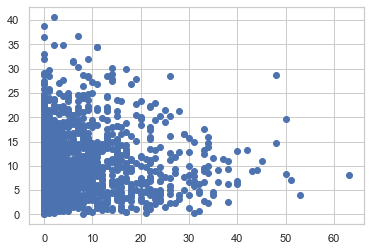

In [146]:
plt.scatter(df["employ"],df["debtinc"])

In [139]:
1+2

3

In [140]:
1+2

3